In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
import tkinter as tk
from tkinter import messagebox,simpledialog
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


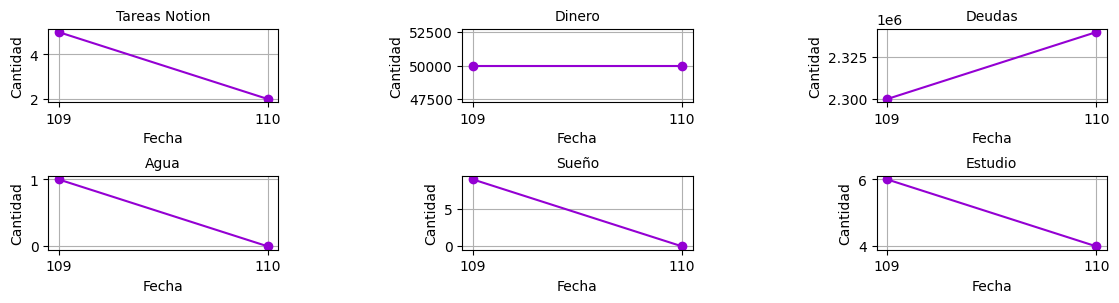

In [57]:

def guardar_datos():
    # Obtener los datos ingresados
    dia = int(entry_dia.get())
    tarea = entry_tarea.get()
    dinero = entry_dinero.get()
    deudas = entry_deudas.get()
    agua = entry_agua.get()
    ejercicio = entry_ejercicio.get()
    sueño = entry_sueño.get()
    estudio = entry_estudio.get()
    feliz = entry_feliz.get()
    
    # Guardar los datos en un archivo CSV
    datos = {'Dia': [dia], 'Tareas Notion': [tarea], 'Dinero': [dinero], 'Deudas': [deudas], 'Agua': [agua],
             'Ejercicio': [ejercicio], 'Sueño': [sueño], 'Estudio': [estudio], 'Felicidad': [feliz]}
    
    df = pd.DataFrame(datos)
    df.to_csv('datos.csv', mode='a', header=not os.path.exists('datos.csv'), index=False)
    
    # Limpiar los campos de la ventana principal
    entry_dia.delete(0, tk.END)
    entry_tarea.delete(0, tk.END)
    entry_dinero.delete(0, tk.END)
    entry_deudas.delete(0, tk.END)
    entry_agua.delete(0, tk.END)
    entry_ejercicio.delete(0, tk.END)
    entry_sueño.delete(0, tk.END)
    entry_estudio.delete(0, tk.END)
    entry_feliz.delete(0, tk.END)

    # Mostrar mensaje de éxito
    messagebox.showinfo('Guardado', 'Datos guardados correctamente en datos.csv')


def graficar_datos():
    # Leer los datos del archivo CSV
    tareas = pd.read_csv('datos.csv')

    # Plot a los datos
    figure = plt.figure(figsize=(15, 10))
    plt.subplot(2,3,1)
    tareas['Tareas Notion'].value_counts().plot(kind="area", title='Tareas de Notion realizadas',color='skyblue')


    # Ejercicio realizado
    plt.subplot(2, 3, 2)
    tareas['Ejercicio'].value_counts().plot(kind='bar', title='Ejercicio realizado', color='lightcoral')

    # Sueño
    plt.subplot(2, 3, 3)
    tareas['Sueño'].astype(float).plot(kind='hist', bins=8, title='Horas de sueño', color='lightgreen')

    # Estudio
    plt.subplot(2, 3, 4)
    tareas['Estudio'].astype(float).plot(kind='hist', bins=10, title='Satisfacción con el estudio', color='gold')

    # Felicidad
    plt.subplot(2, 3, 5)
    tareas['Felicidad'].astype(float).plot(kind='hist', bins=10, title='Nivel de felicidad', color='lightcoral')

    plt.subplot(2, 3, 6)
    plt.plot(tareas['Dia'], tareas['Dinero'], label='Dinero', marker='o', color='green')
    plt.plot(tareas['Dia'], tareas['Deudas'], label='Deudas', marker='x', color='red')
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad')
    plt.title('Dinero y Deudas ')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()

    print("Graficando...")
    plt.show()

def editar_datos():
    # Leer los datos del archivo CSV
    df = pd.read_csv('datos.csv')
    
    # Obtener las fechas disponibles
    fechas_disponibles = df['Dia'].unique()
    
    # Mostrar las fechas disponibles en una lista
    seleccion = int(simpledialog.askstring('Editar datos', 'Seleccione la fecha a editar:', initialvalue=fechas_disponibles[0], 
                                       parent=root))
   
    if not seleccion:
        return  # El usuario canceló la edición
    
    # Filtrar los datos para la fecha seleccionada
    datos_fecha = df[df['Dia']==seleccion]
    print(len(datos_fecha))
    if len(datos_fecha) == 0:
        messagebox.showwarning('Error', f'No se encontraron datos para la fecha {seleccion}')
        return
    
    # Mostrar los datos para la edición
    entry_dia.delete(0, tk.END)
    entry_dia.insert(0, datos_fecha['Dia'].iloc[0])
    entry_tarea.delete(0, tk.END)
    entry_tarea.insert(0, datos_fecha['Tareas Notion'].iloc[0])
    entry_dinero.delete(0, tk.END)
    entry_dinero.insert(0, datos_fecha['Dinero'].iloc[0])
    entry_deudas.delete(0, tk.END)
    entry_deudas.insert(0, datos_fecha['Deudas'].iloc[0])
    entry_agua.delete(0, tk.END)
    entry_agua.insert(0, datos_fecha['Agua'].iloc[0])
    entry_ejercicio.delete(0, tk.END)
    entry_ejercicio.insert(0, datos_fecha['Ejercicio'].iloc[0])
    entry_sueño.delete(0, tk.END)
    entry_sueño.insert(0, datos_fecha['Sueño'].iloc[0])
    entry_estudio.delete(0, tk.END)
    entry_estudio.insert(0, datos_fecha['Estudio'].iloc[0])
    entry_feliz.delete(0, tk.END)
    entry_feliz.insert(0, datos_fecha['Felicidad'].iloc[0])

    df = df[df['Dia'] != seleccion]
    
    df.to_csv('datos.csv', index=False)

    # Limpiar los campos de la ventana principal
    entry_dia.delete(0, tk.END)
    entry_tarea.delete(0, tk.END)
    entry_dinero.delete(0, tk.END)
    entry_deudas.delete(0, tk.END)
    entry_agua.delete(0, tk.END)
    entry_ejercicio.delete(0, tk.END)
    entry_sueño.delete(0, tk.END)
    entry_estudio.delete(0, tk.END)
    entry_feliz.delete(0, tk.END)


def graficar_en_ventana():
    # Leer los datos del archivo CSV
    tareas = pd.read_csv('datos.csv')

    # Crear una figura de Matplotlib con varios subplots
    fig, axs = plt.subplots(2, 3, figsize=(20, 15))

    # Graficar las variables en los subplots
    variables = ['Tareas Notion', 'Dinero', 'Deudas', 'Agua', 'Sueño', 'Estudio']
    for i, variable in enumerate(variables):
        row = i // 3
        col = i % 3
        axs[row, col].plot(tareas['Dia'], tareas[variable], label=variable, marker='o',color = 'darkviolet')
        axs[row, col].set_ylabel('Cantidad')
        axs[row, col].set_xlabel('Fecha')
        axs[row, col].set_title(variable)
        axs[row, col].title.set_size(10)
        axs[row, col].grid(True)
        axs[row, col].set_xticks(tareas['Dia'])

        # Ajustar el diseño de los subplots
    fig.subplots_adjust(hspace=1, wspace=0.8)


    # Crear un widget de lienzo de Matplotlib
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.draw()

    # Colocar el widget de lienzo en la ventana principal
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)




# Crear la ventana principal
root = tk.Tk()
root.title('Aplicación de registro de datos')

tk.Label(root, text='Dia:').pack()
entry_dia = tk.Entry(root)
entry_dia.pack()


# Crear los elementos de la interfaz
tk.Label(root, text='Tarea:').pack()
entry_tarea = tk.Entry(root)
entry_tarea.pack()



tk.Label(root, text='Dinero:').pack()
entry_dinero = tk.Entry(root)
entry_dinero.pack()

tk.Label(root, text='Deudas:').pack()
entry_deudas = tk.Entry(root)
entry_deudas.pack()

tk.Label(root, text='Agua:').pack()
entry_agua = tk.Entry(root)
entry_agua.pack()

tk.Label(root, text='Ejercicio:').pack()
entry_ejercicio = tk.Entry(root)
entry_ejercicio.pack()

tk.Label(root, text='Sueño:').pack()
entry_sueño = tk.Entry(root)
entry_sueño.pack()

tk.Label(root, text='Estudio:').pack()
entry_estudio = tk.Entry(root)
entry_estudio.pack()

tk.Label(root, text='Feliz:').pack()
entry_feliz = tk.Entry(root)
entry_feliz.pack()


# Botón de guardar
tk.Button(root, text='Guardar', command=guardar_datos).pack()

# Botón de graficar
tk.Button(root, text='Graficar', command=graficar_en_ventana).pack()


# Botón de editar
tk.Button(root, text='Editar', command=editar_datos).pack()


# Iniciar el bucle de la interfaz gráfica
root.mainloop()


In [22]:
def graficar_en_ventana():
    # Leer los datos del archivo CSV
    tareas = pd.read_csv('datos.csv')

    # Crear una figura de Matplotlib con varios subplots
    fig, axs = plt.subplots(3, 3, figsize=(15, 10))

    # Graficar las variables en los subplots
    variables = ['Tareas Notion', 'Dinero', 'Deudas', 'Agua', 'Ejercicio', 'Sueño', 'Estudio', 'Felicidad']
    for i, variable in enumerate(variables):
        row = i // 3
        col = i % 3
        axs[row, col].plot(tareas['Dia'], tareas[variable], label=variable, marker='o')
        axs[row, col].set_xlabel('Fecha')
        axs[row, col].set_ylabel('Cantidad')
        axs[row, col].set_title(variable)
        axs[row, col].legend()
        axs[row, col].grid(True)
        axs[row, col].set_xticks(tareas['Dia'])

    # Ajustar el diseño de los subplots
    plt.tight_layout()

    # Crear un widget de lienzo de Matplotlib
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.draw()

    # Colocar el widget de lienzo en la ventana principal
    canvas.get_tk_widget().pack()


0     True
1    False
Name: Dia, dtype: bool